In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
import requests
import io
import apache_log_parser
from pprint import pprint
import os

In [2]:
from typing import List

log_line_data = None
line_parser = apache_log_parser.make_parser("%h %l %u %t \"%r\" %>s %b")
with open(f"{os.getcwd()}/NASA_access_log_Jul95.log", mode='r') as f1:
    with open(f"{os.getcwd()}/NASA_access_log_Aug95.log", mode='r') as f2:
        log_line_data = [line_parser(line) for line in f1.readlines() + f2.readlines()]


In [51]:
df_log_line_data = pd.DataFrame([{"date": df_line["time_received_datetimeobj"], "count": 1} for df_line in log_line_data])
df_log_line_data

,date,count
0,1995-07-01 00:00:01,1
1,1995-07-01 00:00:06,1
2,1995-07-01 00:00:09,1
3,1995-07-01 00:00:11,1
4,1995-07-01 00:00:11,1
...,...,...
3461607,1995-08-31 23:59:49,1
3461608,1995-08-31 23:59:49,1
3461609,1995-08-31 23:59:52,1
3461610,1995-08-31 23:59:52,1


In [4]:
df_log_line_data_by_min = df_log_line_data.groupby(pd.Grouper(key="date", freq="min")).sum()
df_log_line_data_by_min

,count
date,
1995-07-01 00:00:00,42
1995-07-01 00:01:00,61
1995-07-01 00:02:00,57
1995-07-01 00:03:00,71
1995-07-01 00:04:00,70
...,...
1995-08-31 23:55:00,30
1995-08-31 23:56:00,38
1995-08-31 23:57:00,16


In [149]:
df_log_line_data_by_hourly = df_log_line_data.groupby(pd.Grouper(key="date", freq="H")).sum()
df_log_line_data_by_hourly

,count
date,
1995-07-01 00:00:00,3565
1995-07-01 01:00:00,3004
1995-07-01 02:00:00,2268
1995-07-01 03:00:00,1734
1995-07-01 04:00:00,1482
...,...
1995-08-31 19:00:00,2946
1995-08-31 20:00:00,2737
1995-08-31 21:00:00,2463


<AxesSubplot:xlabel='date'>

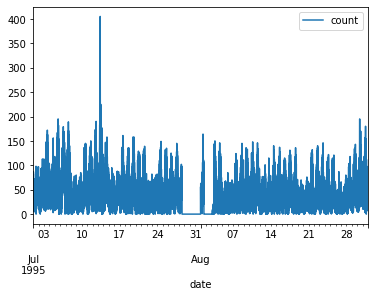

In [5]:
df_log_line_data_by_min.plot()

<AxesSubplot:xlabel='date'>

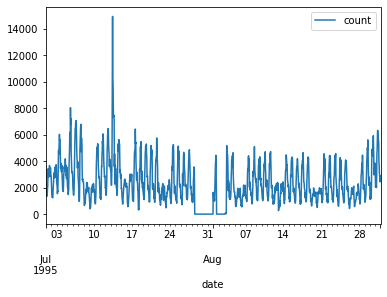

In [49]:
df_log_line_data_by_hourly.plot()

In [148]:
df_log_line_data_by_hourly

NameError: name 'df_log_line_data_by_hourly' is not defined

<AxesSubplot:xlabel='date'>

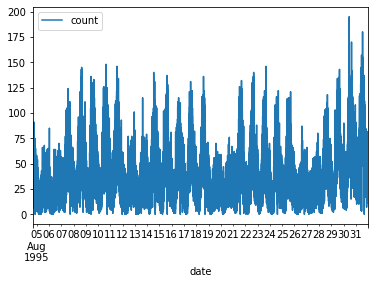

In [8]:
df_log_line_data_by_min_50000 = df_log_line_data_by_min[50000:]
df_log_line_data_by_min_50000.plot()

In [77]:
df_log_line_data_by_min_10000 = df_log_line_data_by_min[60000:70000]
df_log_line_data_by_min_10000['date'] = pd.to_datetime(df_log_line_data_by_min_10000['date']).astype(int) / 10**9
df_log_line_data_by_min_10000.plot()

KeyError: 'date'

In [146]:
# df_log_train, df_log_test = train_test_split(df_log_line_data_by_min_10000["date"])
df_min = df_log_line_data.groupby(pd.Grouper(key="date", freq="min")).sum().reset_index()
df_min_10000 = df_min[60000:70000]


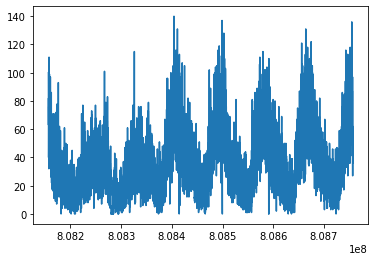

In [147]:
df_min_10000_date = (pd.to_datetime(df_min_10000["date"]).astype(int) / 10**9).array.reshape(-1, 1)
df_min_10000_count = df_min_10000["count"].array.reshape(-1, 1)
plt.plot(df_min_10000_date, df_min_10000_count)

In [178]:
X_train, X_test, y_train, y_test = df_min_10000_date[7500:7510], df_min_10000_date[7510:7520], df_min_10000_count[7500:7510], df_min_10000_count[7510:7520]

In [179]:
X_train.size, X_test.size, y_train.size, y_test.size

(10, 10, 10, 10)

In [191]:
df_S = df_log_line_data.groupby(pd.Grouper(key="date", freq="S")).sum().reset_index()
df_S

,date,count
0,1995-07-01 00:00:01,1
1,1995-07-01 00:00:02,0
2,1995-07-01 00:00:03,0
3,1995-07-01 00:00:04,0
4,1995-07-01 00:00:05,0
...,...,...
5356788,1995-08-31 23:59:49,3
5356789,1995-08-31 23:59:50,0
5356790,1995-08-31 23:59:51,0
5356791,1995-08-31 23:59:52,2


In [192]:
df_S_date = (pd.to_datetime(df_S["date"]).astype(int) / 10**9).array.reshape(-1, 1)
df_S_count = df_S["count"].array.reshape(-1, 1)

In [193]:
df_S_X_train, df_S_X_test, df_S_y_train, df_S_y_test = df_S_date[1000:1060], df_S_date[1060:1120], df_S_count[1000:1060], df_S_count[1060:1120]

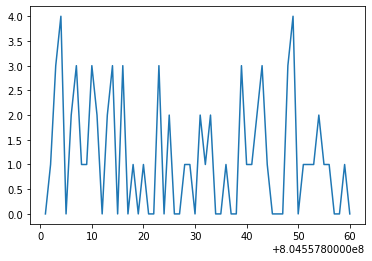

In [194]:
plt.plot(df_S_X_train, df_S_y_train)

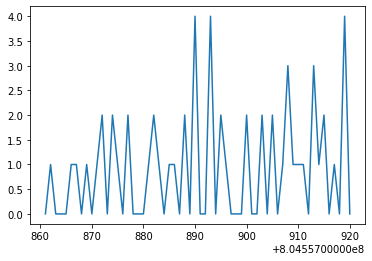

In [195]:
plt.plot(df_S_X_test, df_S_y_test)

In [201]:
lin_reg = LinearRegression().fit(df_S_X_train, df_S_y_train)

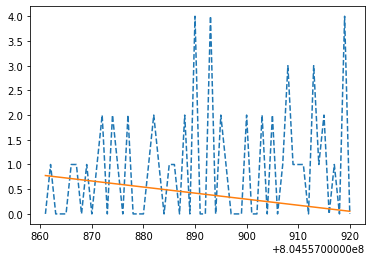

In [202]:
plt.plot(df_S_X_test, df_S_y_test, '--')
plt.plot(df_S_X_test, lin_reg.intercept_ + lin_reg.coef_ * df_S_X_test)

In [198]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [221]:
df_S_ridge = Ridge().fit(df_S_X_train, df_S_y_train)
df_S_lasso = Lasso().fit(df_S_X_train, df_S_y_train)
df_S_enet = ElasticNet(alpha=0.01, l1_ratio=0.5).fit(df_S_X_train, df_S_y_train)

In [208]:
def print_score(model):
    print(round(model.score(df_S_X_train, df_S_y_train), 3))
    print(round(model.score(df_S_X_test, df_S_y_test), 3))  

In [220]:
print_score(df_S_ridge)
print_score(df_S_lasso)
print_score(df_S_enet)

0.032
-0.321
0.03
-0.15
0.0
-0.045


In [228]:
print_score(ElasticNet(alpha=0.001, l1_ratio=0.005).fit(df_S_X_train, df_S_y_train))

0.032
-0.321


In [265]:
df_M = df_log_line_data.groupby(pd.Grouper(key="date", freq="min")).sum().reset_index()
df_M

,date,count
0,1995-07-01 00:00:00,42
1,1995-07-01 00:01:00,61
2,1995-07-01 00:02:00,57
3,1995-07-01 00:03:00,71
4,1995-07-01 00:04:00,70
...,...,...
89275,1995-08-31 23:55:00,30
89276,1995-08-31 23:56:00,38
89277,1995-08-31 23:57:00,16
89278,1995-08-31 23:58:00,17


In [ ]:
df_M = df_log_line_data.groupby(pd.Grouper(key="date", freq="min")).sum().reset_index()
df_M
df_M_date = (pd.to_datetime(df_M["date"]).astype(int) / 10**9).array.reshape(-1, 1)
df_M_count = df_M["count"].array.reshape(-1, 1)

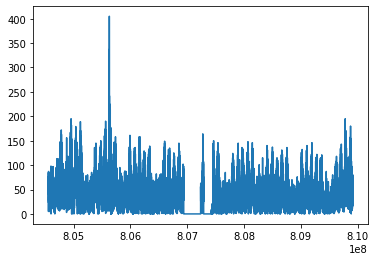

In [264]:
plt.plot(df_M_date, df_M_count)

In [241]:

df_M_X_train, df_M_X_test, df_M_y_train, df_M_y_test = df_M_date[1000:1060], df_M_date[1060:1120], df_M_count[1000:1060], df_M_count[1060:1120]

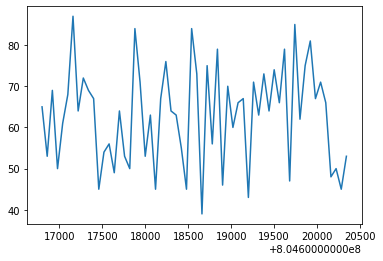

In [242]:
plt.plot(df_M_X_train, df_M_y_train)

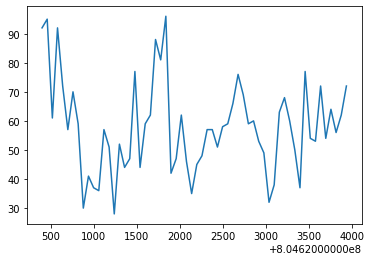

In [243]:
plt.plot(df_M_X_test, df_M_y_test)

In [248]:
df_M_enet = ElasticNet(alpha=1.0, l1_ratio=0.5).fit(df_M_X_train, df_M_y_train)

In [246]:
def print_score(model):
    print(round(model.score(df_M_X_train, df_M_y_train), 3))
    print(round(model.score(df_M_X_test, df_M_y_test), 3))  

In [249]:
print_score(df_M_enet)

0.001
-0.17


In [255]:
df_M_y_pred=df_M_enet.predict(df_M_X_test)


In [256]:
np.mean((df_M_y_pred - df_M_y_test) ** 2)

298.59898495799627

In [257]:
df_M_y_pred

array([63.75847423, 63.78334223, 63.80821024, 63.83307825, 63.85794625,
       63.88281426, 63.90768227, 63.93255028, 63.95741828, 63.98228629,
       64.0071543 , 64.03202231, 64.05689031, 64.08175832, 64.10662633,
       64.13149434, 64.15636234, 64.18123035, 64.20609836, 64.23096637,
       64.25583437, 64.28070238, 64.30557039, 64.33043839, 64.3553064 ,
       64.38017441, 64.40504242, 64.42991042, 64.45477843, 64.47964644,
       64.50451445, 64.52938245, 64.55425046, 64.57911847, 64.60398648,
       64.62885448, 64.65372249, 64.6785905 , 64.70345851, 64.72832651,
       64.75319452, 64.77806253, 64.80293053, 64.82779854, 64.85266655,
       64.87753456, 64.90240256, 64.92727057, 64.95213858, 64.97700659,
       65.00187459, 65.0267426 , 65.05161061, 65.07647862, 65.10134662,
       65.12621463, 65.15108264, 65.17595065, 65.20081865, 65.22568666])

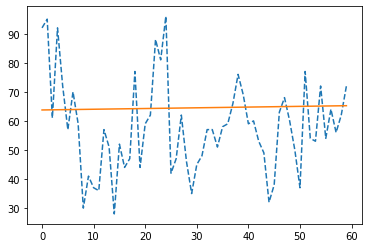

In [261]:
plt.plot(df_M_y_test, '--')
plt.plot(df_M_y_pred.reshape(-1, 1))

In [270]:
df2_M_X_train, df2_M_X_test, df2_M_y_train, df2_M_y_test = df_M_date[80000:80060], df_M_date[80060:80120], df_M_count[80000:80060], df_M_count[80060:80120]

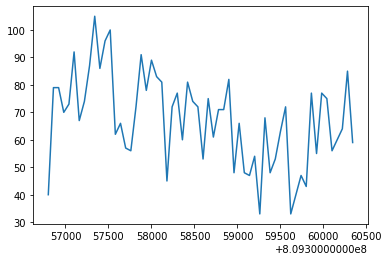

In [271]:
plt.plot(df2_M_X_train, df2_M_y_train)

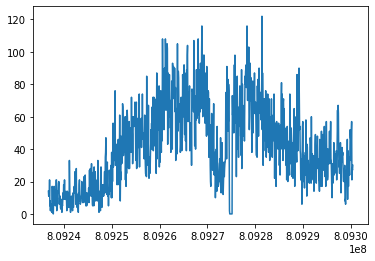

In [276]:
plt.plot(df_M_date[78000:79060], df_M_count[78000:79060])

In [277]:
df_H = df_log_line_data.groupby(pd.Grouper(key="date", freq="H")).sum().reset_index()
df_H


,date,count
0,1995-07-01 00:00:00,3565
1,1995-07-01 01:00:00,3004
2,1995-07-01 02:00:00,2268
3,1995-07-01 03:00:00,1734
4,1995-07-01 04:00:00,1482
...,...,...
1483,1995-08-31 19:00:00,2946
1484,1995-08-31 20:00:00,2737
1485,1995-08-31 21:00:00,2463
1486,1995-08-31 22:00:00,2896


In [278]:
df_H_date = (pd.to_datetime(df_H["date"]).astype(int) / 10**9).array.reshape(-1, 1)
df_H_count = df_H["count"].array.reshape(-1, 1)

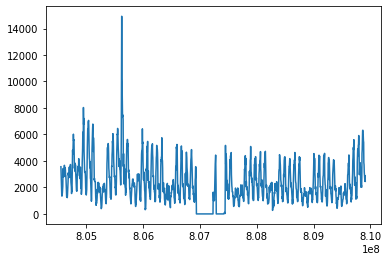

In [279]:
plt.plot(df_H_date, df_H_count)

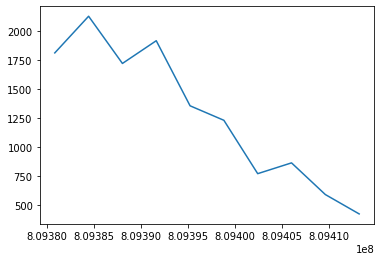

In [285]:
plt.plot(df_H_date[1340:1350], df_H_count[1340:1350])

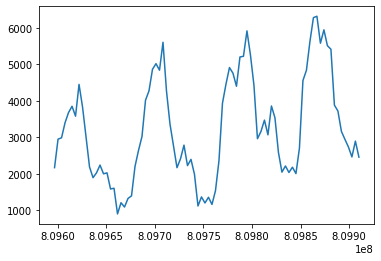

In [284]:
plt.plot(df_H_date[1400:], df_H_count[1400:])

In [289]:
df_H_X_train, df_H_X_test, df_H_y_train, df_H_y_test = df_H_date[1330:1340], df_H_date[1340:1350], df_H_count[1330:1340], df_H_count[1340:1350]

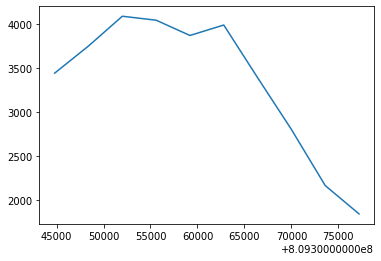

In [290]:
plt.plot(df_H_X_train, df_H_y_train)

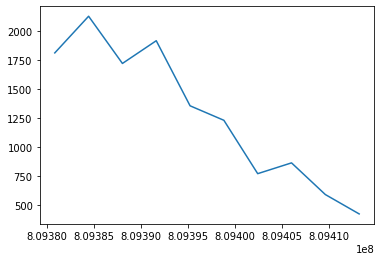

In [291]:
plt.plot(df_H_X_test, df_H_y_test)

In [292]:
df_H_enet = ElasticNet(alpha=1.0, l1_ratio=0.5).fit(df_H_X_train, df_H_y_train)

In [293]:
df_H_y_pred=df_H_enet.predict(df_H_X_test)


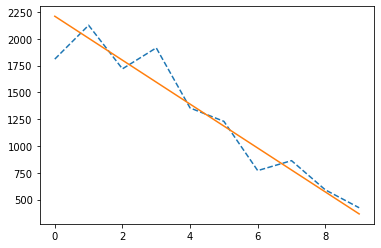

In [294]:
plt.plot(df_H_y_test, '--')
plt.plot(df_H_y_pred.reshape(-1, 1))

In [295]:
type(df_H_y_pred)

numpy.ndarray

In [296]:
pd.DataFrame(df_H_y_pred)

,0
0,2211.266765
1,2006.187994
2,1801.109224
3,1596.030454
4,1390.951684
5,1185.872914
6,980.794144
7,775.715374
8,570.636604
9,365.557834
